In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# signal processing
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz

In [7]:
os.chdir('/Users/kumarmohit/Documents/ubicomp/bonus exe1/Ubicomp2020-BE1-data')

In [35]:
X = pd.read_csv('data-accel_x.csv')
Y = pd.read_csv('data-accel_y.csv')
Z = pd.read_csv('data-accel_z.csv')
ecg= pd.read_csv('data-ecg.csv')
ppg=pd.read_csv('data-ppg.csv')
barometer=pd.read_csv('data-barometer.csv')
tmp=pd.read_csv('data-temperature.csv')
#Y = pd.read_csv('test_emg.csv').drop('Id',axis=1)
#X_train_eeg1 = pd.read_csv('train_eeg1.csv').drop('Id', axis=1) #read csv then drop id column
#X_train_eeg2 = pd.read_csv('train_eeg2.csv').drop('Id', axis=1) #read csv then drop id column

In [106]:
rows=ecg.shape[0]
fs=128 # Sampling frequency = 128Hz, i.e 128 samples in 1 second
Total_time=round(ecg.shape[0]/fs)
ts15 = 15*fs # samples in 15 second
ts60 = 60*fs # samples in 60 seconds
num_res1 = round(rows/ts15)
num_res3 = round(rows/ts60)

In [107]:
Total_time

480

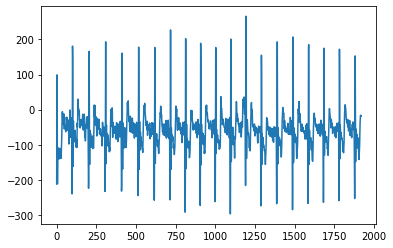

In [47]:
plt.plot(ecg[:1920])

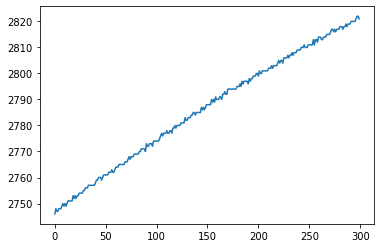

In [40]:
plt.plot(tmp[:300])

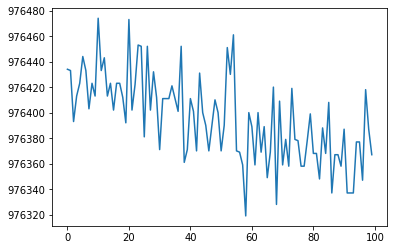

In [42]:
plt.plot(barometer[:100])

In [132]:
ecg.shape

(61439, 1)

In [176]:
# create a plot for the comparison purpose
cnt=21
step=np.arange(0,ecg.shape[0],ts15)
r=np.arange(0,rows)
if cnt==31:
    data_range=r[step[cnt]:]
else:
    data_range=r[step[cnt]:step[cnt+1]]



x=np.arange(data_range[0],data_range[0]+len(data_range)+1,fs)
# xlabel=np.arange(0,15)
x
#data_range[len(data_range)-1]


array([40320, 40448, 40576, 40704, 40832, 40960, 41088, 41216, 41344,
       41472, 41600, 41728, 41856, 41984, 42112, 42240])

In [391]:
# create a plot for the comparison purpose
def plot_eeg_ppg(time_step):# in second, range from 1 to 32
    cnt=time_step-1
    step=np.arange(0,ecg.shape[0],ts15)
    r=np.arange(0,rows)
    if cnt==31:
        data_range=r[step[cnt]:]
        x=np.arange(data_range[0],data_range[0]+len(data_range)+2,fs)
        tmp=int(data_range[0]/fs)
        xlabel=np.arange(tmp,tmp+16)
    else:
        data_range=r[step[cnt]:step[cnt+1]]
        x=np.arange(data_range[0],data_range[0]+len(data_range)+1,fs)
        tmp=int(data_range[0]/fs)
        xlabel=np.arange(tmp,tmp+16)


    plt.style.use('fivethirtyeight')
    #fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=[25,30])
    fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=[20,10])
    ax1.set_title('Plots')
    ax2.set_xlabel('Time(sec)')
    ax1.set_ylabel('ecg')
    ax2.set_ylabel('ppg')
    #ax3.set_ylabel('barometer')
    #ax4.set_ylabel('temperature')
    # ax4.set_xticks(x)
    # ax4.set_xticklabels(xlabel)
    # ax3.set_xticks(x)
    # ax3.set_xticklabels(xlabel)
    ax2.set_xticks(x)
    ax2.set_xticklabels(xlabel)
    ax1.set_xticks(x)
    ax1.set_xticklabels(xlabel)
    #ax1.set_xlim(0,15*fs)
    ax1.plot(data_range,ecg.iloc[data_range],color='b')
    ax2.plot(data_range,ppg.iloc[data_range],color='g')
    # ax3.plot(data_range,barometer.iloc[data_range],color='r')
    # ax4.plot(data_range,tmp.iloc[data_range],color='m')


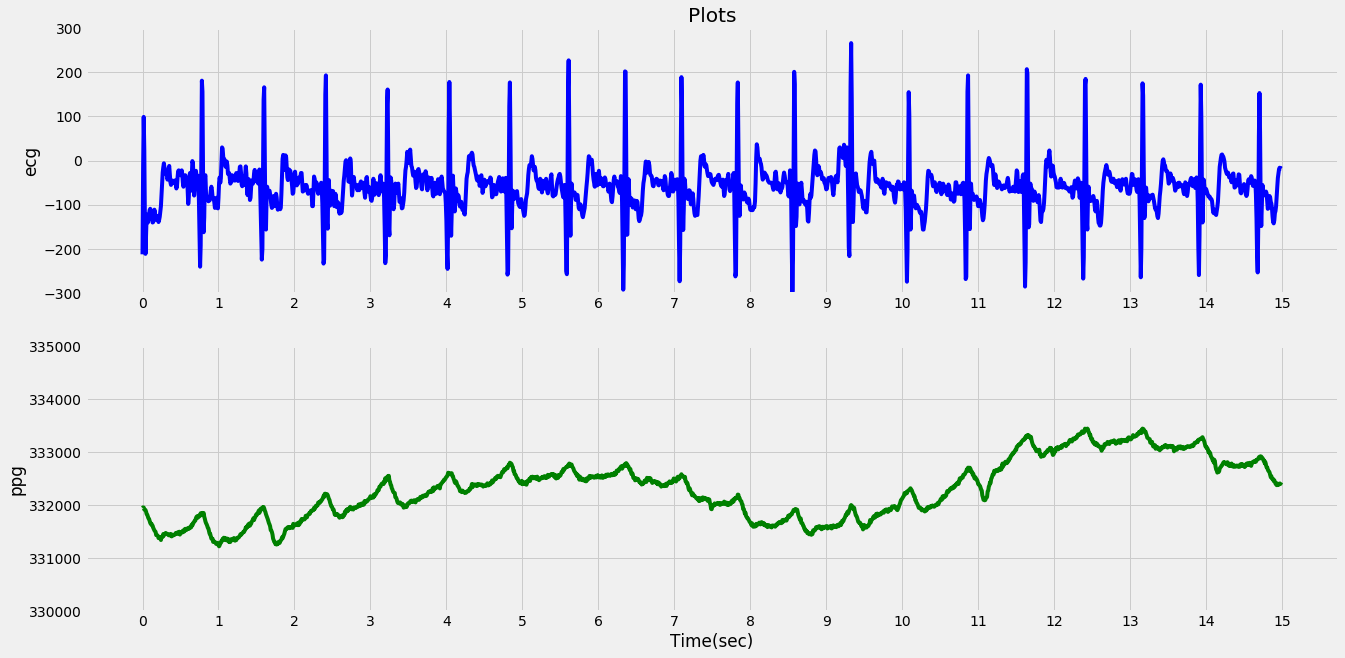

In [469]:
# create a plot for the comparison purpose
#def plot_eeg_ppg(time_step):# in second, range from 1 to 32
# cnt=time_step-1
# step=np.arange(0,ecg.shape[0],fs*3)
# r=np.arange(0,rows)
# if cnt==31:
#     data_range=r[step[cnt]:]
# else:
#     data_range=r[step[cnt]:step[cnt+1]]

start_time=0
end_time=15
data_range = np.arange(start_time*fs,end_time*fs)
x=np.arange(data_range[0],data_range[0]+len(data_range)+1,fs)
xlabel=np.arange(start_time,end_time+1)


plt.style.use('fivethirtyeight')
#fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=[25,30])
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=[20,10])
ax1.set_title('Plots')
ax2.set_xlabel('Time(sec)')
ax1.set_ylabel('ecg')
ax2.set_ylabel('ppg')
#ax3.set_ylabel('barometer')
#ax4.set_ylabel('temperature')
# ax4.set_xticks(x)
# ax4.set_xticklabels(xlabel)
# ax3.set_xticks(x)
# ax3.set_xticklabels(xlabel)
ax2.set_xticks(x)
ax2.set_xticklabels(xlabel)
ax1.set_xticks(x)
ax1.set_xticklabels(xlabel)
ax1.set_ylim(-300,300)
ax2.set_ylim(330000,335000)

ax1.plot(data_range,ecg.iloc[data_range],color='b')
ax2.plot(data_range,ppg.iloc[data_range],color='g')
# ax3.plot(data_range,barometer.iloc[data_range],color='r')
# ax4.plot(data_range,tmp.iloc[data_range],color='m')


In [203]:
len(xlabel)

4

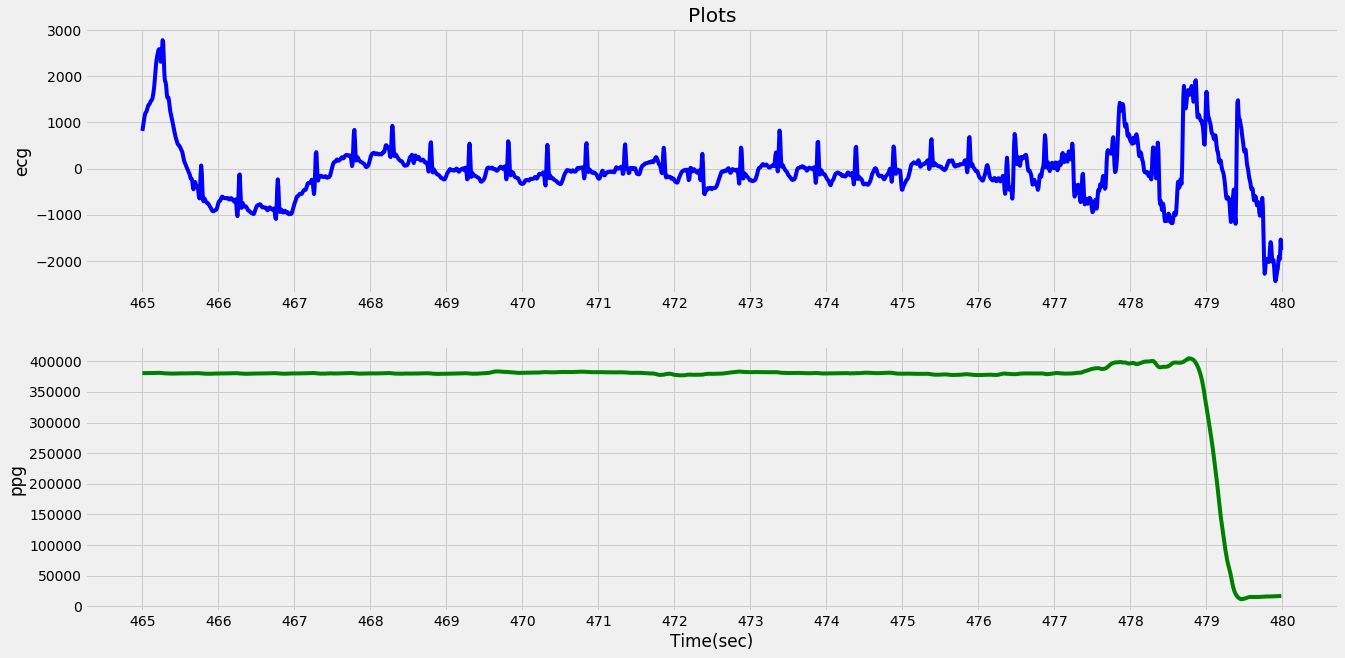

In [647]:
plot_eeg_ppg(32)

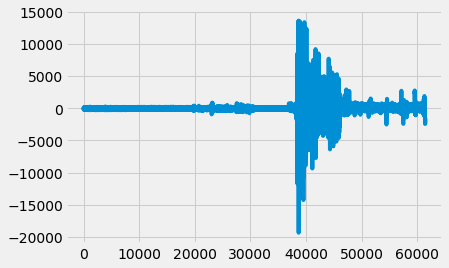

In [384]:
plt.plot(ecg)

# Preprocessing

In [652]:
nyq = 0.5 * fs
cutoff = 40
normal_cutoff = cutoff / nyq
b, a = signal.butter(2, normal_cutoff, btype='high')
#High pass filter
y = signal.filtfilt(b, a, ecg,0)
#Low pass filter
cutoff=0.5
normal_cutoff = cutoff / nyq
b, a = signal.butter(2, normal_cutoff, btype='low')
y = signal.filtfilt(b, a, y,0)

In [654]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

In [655]:
y=butter_bandpass_filter(ecg,0.5,40,fs,4)

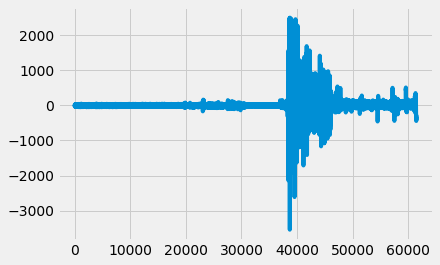

In [656]:
plt.plot(y)

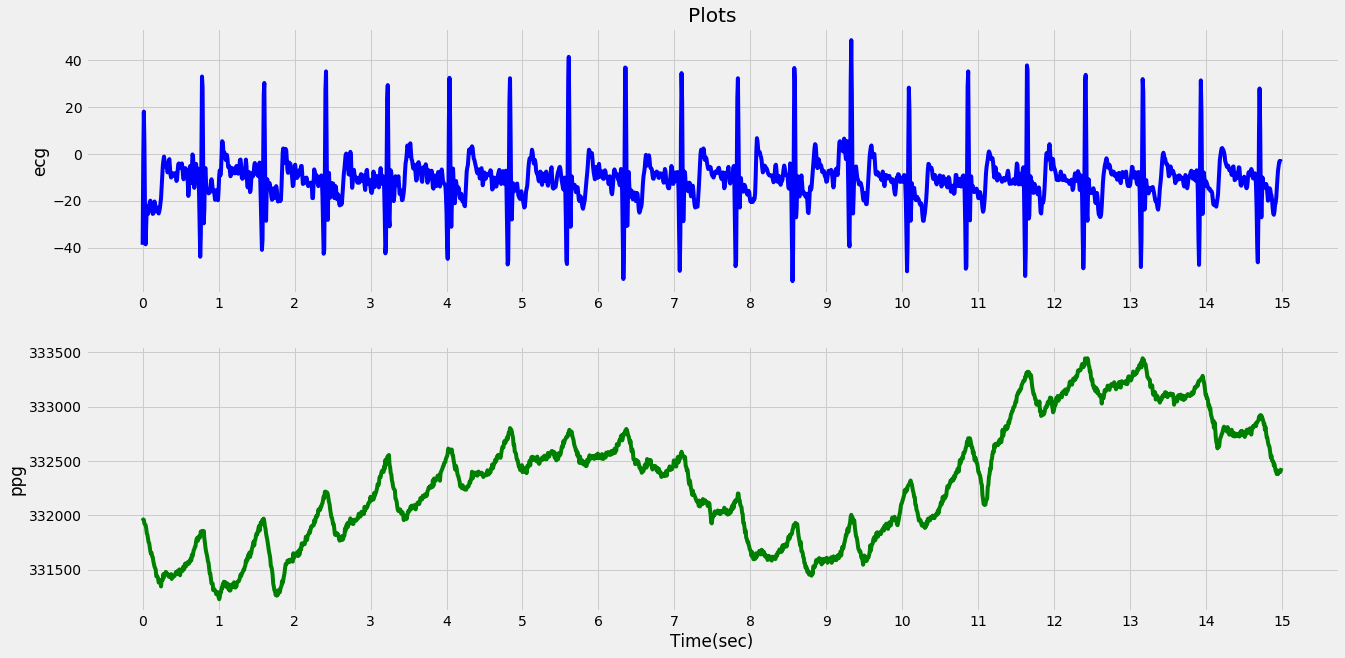

In [657]:
# create a plot for the comparison purpose
#def plot_eeg_ppg(time_step):# in second, range from 1 to 32
# cnt=time_step-1
# step=np.arange(0,ecg.shape[0],fs*3)
# r=np.arange(0,rows)
# if cnt==31:
#     data_range=r[step[cnt]:]
# else:
#     data_range=r[step[cnt]:step[cnt+1]]

start_time=0
end_time=15
data_range = np.arange(start_time*fs,end_time*fs)
x=np.arange(data_range[0],data_range[0]+len(data_range)+1,fs)
xlabel=np.arange(start_time,end_time+1)


plt.style.use('fivethirtyeight')
#fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=[25,30])
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=[20,10])
ax1.set_title('Plots')
ax2.set_xlabel('Time(sec)')
ax1.set_ylabel('ecg')
ax2.set_ylabel('ppg')
#ax3.set_ylabel('barometer')
#ax4.set_ylabel('temperature')
# ax4.set_xticks(x)
# ax4.set_xticklabels(xlabel)
# ax3.set_xticks(x)
# ax3.set_xticklabels(xlabel)
ax2.set_xticks(x)
ax2.set_xticklabels(xlabel)
ax1.set_xticks(x)
ax1.set_xticklabels(xlabel)
#ax1.set_ylim(-300,300)
#ax2.set_ylim(330000,335000)

ax1.plot(data_range,y[data_range],color='b')
ax2.plot(data_range,ppg.iloc[data_range],color='g')
# ax3.plot(data_range,barometer.iloc[data_range],color='r')
# ax4.plot(data_range,tmp.iloc[data_range],color='m')


In [369]:
# y1=y
# notch_freq_Hz = np.array([50.0])  # main + harmonic frequencies
# for freq_Hz in np.nditer(notch_freq_Hz):  # loop over each target freq
#     bp_stop_Hz = freq_Hz + 3.0*np.array([-1, 1])  # set the stop band
#     b, a = signal.butter(3, bp_stop_Hz/(fs / 2.0), 'bandstop')
#     y1 = signal.lfilter(b, a, y1, 0)

In [ ]:
window_len=10
s=np.r_[y[window_len-1:0:-1],y,y[-1:-window_len:-1]]

# Calculation HR

In [658]:
# Calculate the peak to peak value for each time_step
final=[]
def peak(sig):
    step=np.arange(0,len(sig),ts15)
    #print(step)
    r=np.arange(0,len(sig))
    #print(r)
    for cnt in range(32):
        rr_peaks=[] 
        if cnt==31:
            data_range=r[step[cnt]:]
            x=np.arange(data_range[0],data_range[0]+len(data_range),fs)
            tmp=int(data_range[0]/fs)
            xlabel=np.arange(tmp,tmp+16)
        else:
            data_range=r[step[cnt]:step[cnt+1]]
            x=np.arange(data_range[0],data_range[0]+len(data_range),fs)
            tmp=int(data_range[0]/fs)
            xlabel=np.arange(tmp,tmp+16)
            
        tmp_sig=sig[data_range]
        threshold=np.arange(10,1500,10)
        for thres in threshold:
            count=0
            rr_peaks=[]
            for i in range(0,len(tmp_sig)):
                if tmp_sig[i]>=thres:
                    #count=count+1
                    var=data_range[0]+i
                    if(len(rr_peaks)==0):
                        count=count+1
                        rr_peaks.append(var/fs) 
                    elif((var/fs- rr_peaks[-1])>=0.5 ):
                        count=count+1
                        rr_peaks.append(var/fs)
            if(count<=27 and count>=15):
                print("step " + str(cnt) + " : " )
                print(thres)
                break
        
        print("step " + str(cnt) + " : " )
        print (rr_peaks)  
        print(len(rr_peaks))
        rr_peaks=np.diff(rr_peaks)
        print (rr_peaks)  
        print(len(rr_peaks))
        final.append(np.median(rr_peaks))
        
    return final

In [659]:
x=peak(y)

step 0 : 
10
step 0 : 
[0.015625, 0.78125, 1.59375, 2.40625, 3.21875, 4.03125, 4.828125, 5.6015625, 6.3515625, 7.09375, 7.828125, 8.578125, 9.3203125, 10.0859375, 10.859375, 11.640625, 12.40625, 13.1640625, 13.9296875, 14.6953125]
20
[0.765625  0.8125    0.8125    0.8125    0.8125    0.796875  0.7734375
 0.75      0.7421875 0.734375  0.75      0.7421875 0.765625  0.7734375
 0.78125   0.765625  0.7578125 0.765625  0.765625 ]
19
step 1 : 
10
step 1 : 
[15.4765625, 16.2578125, 17.0234375, 17.7734375, 18.5234375, 19.2890625, 20.0546875, 20.8203125, 21.59375, 22.3671875, 23.1484375, 23.90625, 24.6640625, 25.4296875, 26.1875, 26.9375, 27.6640625, 28.390625, 29.125, 29.875]
20
[0.78125   0.765625  0.75      0.75      0.765625  0.765625  0.765625
 0.7734375 0.7734375 0.78125   0.7578125 0.7578125 0.765625  0.7578125
 0.75      0.7265625 0.7265625 0.734375  0.75     ]
19
step 2 : 
10
step 2 : 
[30.609375, 31.3359375, 32.0703125, 32.8046875, 33.5703125, 34.3359375, 35.0859375, 35.8359375, 36.593

step 30 : 
70
step 30 : 
[450.0, 450.59375, 451.109375, 451.609375, 452.1171875, 453.140625, 453.6484375, 454.1640625, 454.671875, 456.1875, 456.703125, 457.203125, 457.7109375, 458.2109375, 458.71875, 459.2265625, 459.734375, 460.234375, 460.734375, 461.2421875, 461.7421875, 462.2421875, 462.75, 463.25, 463.765625, 464.265625, 464.765625]
27
[0.59375   0.515625  0.5       0.5078125 1.0234375 0.5078125 0.515625
 0.5078125 1.515625  0.515625  0.5       0.5078125 0.5       0.5078125
 0.5078125 0.5078125 0.5       0.5       0.5078125 0.5       0.5
 0.5078125 0.5       0.515625  0.5       0.5      ]
26
step 31 : 
10
step 31 : 
[465.0, 465.5, 467.28125, 467.78125, 468.28125, 468.78125, 469.296875, 469.8046875, 470.3203125, 470.828125, 471.3359375, 471.8515625, 472.359375, 472.8671875, 473.3671875, 473.875, 474.375, 474.875, 475.375, 475.875, 476.375, 476.875, 477.6875, 478.2890625, 478.7890625, 479.3984375]
26
[0.5       1.78125   0.5       0.5       0.5       0.515625  0.5078125
 0.515625 

In [660]:
x

[0.765625,
 0.7578125,
 0.75390625,
 0.78125,
 0.6953125,
 0.6875,
 0.6875,
 0.671875,
 0.65234375,
 0.65625,
 0.625,
 0.63671875,
 0.578125,
 0.5234375,
 0.53515625,
 0.5625,
 0.578125,
 0.71875,
 0.734375,
 0.6328125,
 0.5,
 0.5078125,
 0.515625,
 0.5234375,
 0.6328125,
 0.578125,
 0.63671875,
 0.5,
 0.5078125,
 0.5,
 0.5078125,
 0.5078125]

In [661]:
hr_ecg=[60/i for i in x]
hr

[77.57575757575758,
 78.76923076923077,
 80.0,
 75.29411764705883,
 85.33333333333333,
 86.77966101694915,
 88.27586206896552,
 88.27586206896552,
 91.42857142857143,
 91.42857142857143,
 94.81481481481481,
 94.81481481481481,
 102.4,
 116.36363636363636,
 121.9047619047619,
 88.27586206896552,
 102.4,
 80.0,
 82.58064516129032,
 88.27586206896552,
 116.36363636363636,
 111.30434782608695,
 121.9047619047619,
 116.36363636363636,
 128.0,
 128.0,
 128.0,
 121.9047619047619,
 116.36363636363636,
 119.06976744186046,
 116.36363636363636,
 106.66666666666667]

# Calculation HR using ppg